
# Project: Investigate a Dataset - [No Show Appointments-]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this dataset there is a collection of information from 111k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. 1. ScheduledDay: which tells us on what day the patient set up their appointment, and this is before appointment. 2. Neighborhood indicates the location of the hospital. 3. Scholarship indicates whether or not the patient is enrolled in Brasilian welfare programand.4. PatientId: Patient identification number. 5. AppointmentID: Identification number of each appointment. 6. Gender: Male (M) or Female (F). 7. AppointmentDay: The day of the actuall appointment, when they have to visit the doctor. 8. Age: Patients age. 9. Hipertension: True (1) or False (0). 10. Diabetes: True (1) or False (0). 11. Alcoholism: True (1) or False (0). 12. Handcap: The handcap refers to the number of desabilites a person has. 13. SMS_received: 1 or more messages sent to the patient. 14. No-show: Yes or No.



### Question(s) for Analysis

>**In this project I will be analyzing this dataset to point out about five possible factors that could have an influnce on the showing up of patients on appointment day.

1. **Is there any correlation between sms received and appointment show up.
2. **Does patients have a scholarship has any influence on apointment show up:
3. **Checking if there is any relationship between peoples personal ailment and no-shows.
4. **What is the possibility that gender could influence the patients show up
5. **What is the effect of age on patience showing up for appointment.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In [3]:
#load and print dataset on the dataframe
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#Print helpful information about the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#display dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [14]:
#Display the size of the row and column of the dataset
df.shape

(110527, 14)

In [16]:
#Checking for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [17]:
# check for duplicates
duplicates = df.duplicated()
duplicates.sum()

0

In [16]:
#display statistical information about the dataset 
df['SMS_received'].describe()

count    110527.000000
mean          0.321026
std           0.466873
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: SMS_received, dtype: float64

In [6]:
#Display the number of turn ups and missed appointments 
df["No-show"].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [5]:
#Display a detailed information about no-show column.
df["No-show"].describe()

count     110527
unique         2
top           No
freq       88208
Name: No-show, dtype: object

In [13]:
#count the number of male and female in dataset.
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [6]:
#Print a detailed information about patients age.
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

The average age in this dataset is 37, and the heighest age is 115, while -1 is the minimum age but with a negative number,which is an error.


### Data Cleaning
> Dropping columns we won't be using, fixing data in AGE (dropping the age with negative number). Fix data types; convert scheduled day and appointment day from object to date-time, Typos in the column names should be corrected for unification and ease in coding. There are 13 independent and one dependent variables in the dataset. The dataset does not contain any missing values. 
 

In [7]:
#Delet irrelevant columns Appointmentid
df.drop(['AppointmentID'], axis=1, inplace=True)

In [8]:
#diplay dataset
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
#converting scheduledday and appointmentday to datetime
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [10]:
df.dtypes

PatientId                float64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [11]:
# Identifying the negative values in age
Error = df.query('Age < 0')
Error

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
# droping the row with a negative age
df.drop(99832, axis = 0 ,inplace=True)

In [13]:
Error = df.query('Age < 0')
Error

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [14]:
# Typos in the column names as well as their format should be corrected / unified
df.columns = ['patient_id', 'gender', 'scheduled_day', 
              'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
              'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns

Index(['patient_id', 'gender', 'scheduled_day', 'appointment_day', 'age',
       'neighbourhood', 'scholarship', 'hypertension', 'diabetes',
       'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

In [15]:
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# <a id='eda'></a>
## Exploratory Data Analysis


In [16]:
# Changing the No-show column values to 0s and 1s
df['no_show'] = df['no_show'].apply(lambda x: 0 if x == 'No' else 1)

In [42]:
# Function to plot percentage distribuiton
def pie_plot(df, list_labels, title, title_fontsize=None):
    """
    Input DataFrame, list of labels and title and return pie plot.
    Opcional Input: fontsize title.
    """
    (df.value_counts(normalize=True) * 100).plot.pie(autopct='%1.0f%%', labels=list_labels)
    plt.title(title, fontsize=title_fontsize);

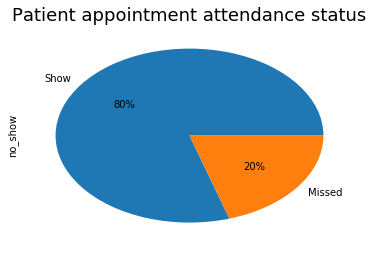

In [30]:
pie_plot(df['no_show'], ['Show', 'Missed'], 'Patient appointment attendance status', title_fontsize=18)

About 20% of the appointment where missed about 80% of patient turned up

In [18]:
# check general corelation of column
df.corr()

,patient_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
patient_id,1.000000,-0.004121,-0.002877,-0.006436,0.001608,0.011014,-0.007915,-0.009742,-0.001456
age,-0.004121,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,-0.060327
scholarship,-0.002877,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.029134
hypertension,-0.006436,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.035704
diabetes,0.001608,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.015181
alcoholism,0.011014,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,-0.000197
handicap,-0.007915,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,-0.006077
sms_received,-0.009742,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.126428
no_show,-0.001456,-0.060327,0.029134,-0.035704,-0.015181,-0.000197,-0.006077,0.126428,1.000000


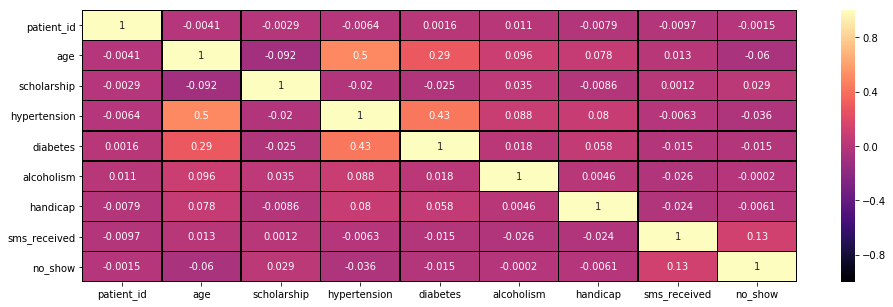

In [31]:
# Visualizing correlation between columns with heatmap matrix
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='magma', linewidths=.5, linecolor='black');

Based on the displayed result, it's obvious that most of the independent variables don't have effects on the no_show as there is little or no correlation between any of them. The highest correlation is with the sms_received.

In [19]:
#A function to a relationship between two variables.
def get_proportions(df, indpendent_var, dependent_var, ivy, ivn, dvy, dvn):
    """ This function takes a DataFrame and 2 binomial variables and returns the proportions of all possibilities.
    This can be used to check the effects of the independent variables on the dependent variable"""
    yes = df[df[indpendent_var]>=ivy]
    no = df[df[indpendent_var]==ivn]
    prop_yes_yes = len(yes[yes[dependent_var]==dvy])/len(yes)
    prop_yes_no = len(yes[yes[dependent_var]==dvn])/len(yes)
    prop_no_yes = len(no[no[dependent_var]==dvy])/len(no)
    prop_no_no = len(no[no[dependent_var]==dvn])/len(no)
    
    return [prop_yes_yes, prop_yes_no, prop_no_yes, prop_no_no]

def bar_chart_proportions(df, indpendent_var, dependent_var, ivy=1, ivn=0, dvy=1, dvn=0):
    """Plot a bar chart showing the proportions by the independent variable on the dependent variable."""
    proportions = get_proportions(df, indpendent_var, dependent_var, ivy, ivn, dvy, dvn)
    ind = np.arange(int(len(proportions)/2))
    width = 0.45
    size = 12
    plt.figure(figsize=(size*0.75,size/2))
    plt.bar(ind, [proportions[0],proportions[2]], width, color='#D73222', alpha=.8, label=dependent_var)
    plt.bar(ind + width, [proportions[1],proportions[3]], width, color='#008F7A', alpha=.8, label="Not "+dependent_var)
    plt.ylabel('Proportion', fontsize=size)
    plt.xlabel(indpendent_var, fontsize=size)
    plt.title('Proportion by {0} for {1}'.format(indpendent_var, dependent_var), fontsize=size*1.25)
    locations = ind + (width / 2)
    if ivy == 1 and ivn == 0:
        labels = ['Yes', 'No']
    else:
        labels = [ivy, ivn]
    plt.xticks(locations, labels, fontsize=size*0.9)
    plt.yticks(fontsize=size*0.9)
    plt.legend(fontsize=size)
    plt.show()

>**Is there any correlation between sms received and appointment show up.


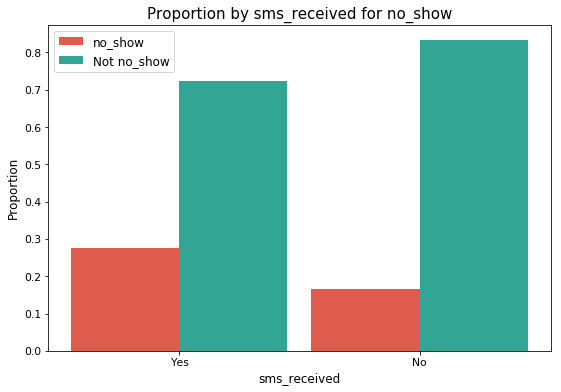

In [42]:
# Correlation of no show patients based on sms received 
bar_chart_proportions(df, 'sms_received', 'no_show')

From this result we see that patients who received an SMS had a higher percentage of not showing up. This might be due to other unknown criteria, but it would be great to further explore this. To do that it will require further data on the time the SMS was sent and also the personality of the patients that received or did not receive sms.

>>**Does patients have a scholarship has any influence on apointment show up:

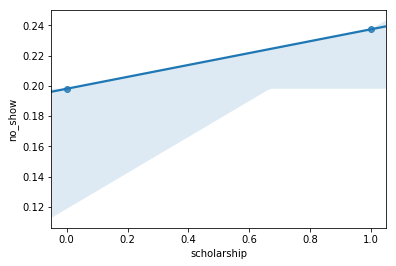

In [39]:
#scatter plot with line showing the percentage of no show patients by scholarship
no_show_mean = df['no_show'].groupby(df['scholarship']).mean()
scholarship = df['scholarship'].unique()
sns.regplot(x = scholarship, y = no_show_mean)
plt.xlabel('scholarship')
plt.show()

Based on the result above, it looks like the patients with scholarship are more likely to miss the appointment. About 24% of patients with scholarship didn't show up for their appointments, while about 20% of patients without scholarship missed their appointments.   

>** Checking if there is any relationship between peoples personal ailment and no-shows.

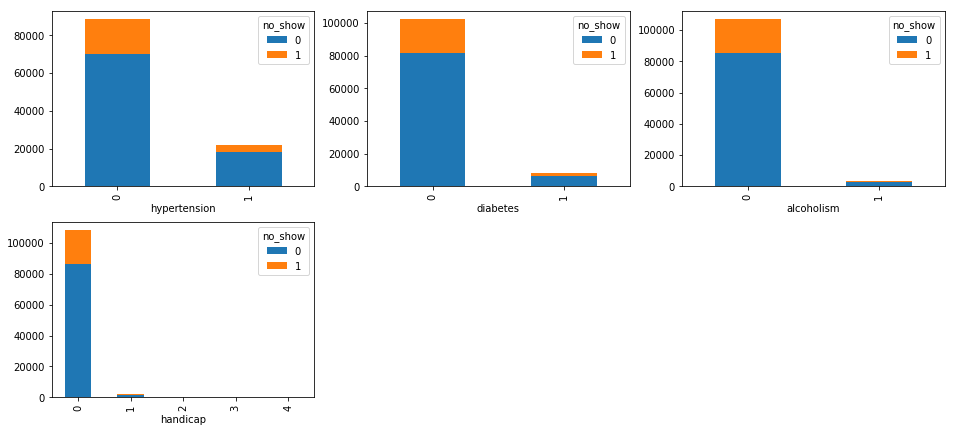

In [27]:
#A plot to display all the patient health conditions and no show
col_list = ['hypertension', 'diabetes', 'alcoholism', 'handicap']
fig = plt.figure(figsize=(16, 11))
for i, col in enumerate(col_list):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([col, 'no_show'])[col].count().unstack('no_show').plot(ax=ax, kind='bar', stacked=True)

This result show that patients with health condition are likely to show up for their appointment. while those without health conditions are unlikely to, but with futher data about severity of their health condition we could explore more on the analysis.

>**What is the possibility that gender could influence the patients show up


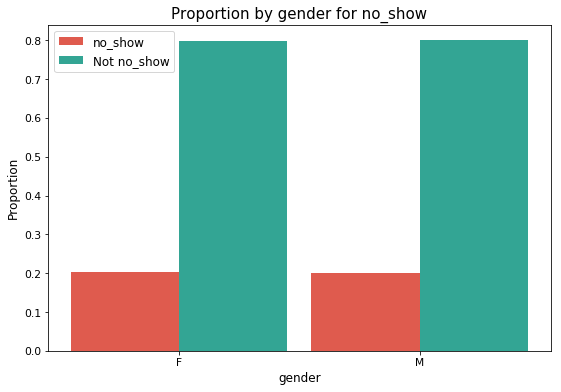

In [44]:
# Exploring the correlation of gender on no show apointment
bar_chart_proportions(df, 'gender', 'no_show', 'F', 'M')


The posibility of gender inluencing no show patience apointment is negative base on the displayed result.

>**What is the effect of age on patience showing up for appointment.

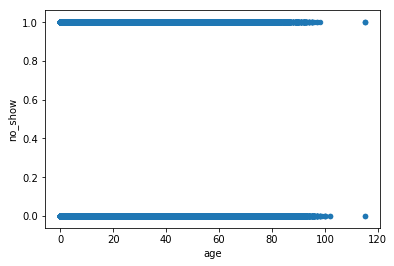

In [44]:
# Correlation between patients with scholarship and no_show
df.plot(x="age", y="no_show", kind="scatter");

We can see that Age has no effect on the No show appointment

<a id='conclusions'></a>
## Conclusions

> **Results:**

In this project I analyzed Medical Appointment No Shows Dataset using Python libraries NumPy, pandas, and communicated my findings with Matplotlib and seaborn. The dataset contained approximatly 111k appointments, about 20% of the patients didn't show up for their appointments while about 80% asummed showing up. Based on my analysis result I can say that gender has no effect on the no show variable. SMS_received variable has the highest correlation on the chart but needed more data for more exploration. Furthermore, there was no direct correlation among most of the independent variables and with the no-show variable. Even patients with scholarship missed their apointment with about 4% margin than patients without scholarship.  On average, 20% of appointments were missed. Patients with health conditions are likely to turn up for their appointment.

Out of 38685 appointments made by males, 7723 were missed with the ratio of 20%. 
Out of 71831 appointments made by females, 14588 were missed with the ratio of 20%.


> **Limitations and suggestions:**

One limitation that affected my analysis is the absence of relevant or backkgound data, the independent variables in the dataset provided has no clear correlation with the dependent varible.

**Providing Data like:**
Time the sms was sent and the demographic information about patients that recieved them.
The severity of patience with special condition.


In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

References:
questions on google, Stack Overflow, YouTube.
pandas documentation.